# <font color = 'Blue'><center> <b>Electrical_Fault_Classification</b> </center>

In [1]:
import pandas as mypd 
import numpy as mynp 
import seaborn as mysns 
import matplotlib.pyplot as myplt 
%matplotlib inline 
from datetime import datetime

In [2]:
# Get current timestamp
timestamp = datetime.now()

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
mydf = mypd.read_csv("Fault_Class_Data.csv")

In [5]:
mydf.head()

,O_G,O_A,O_B,O_C,Ir,Iy,Ib,Vr,Vy,Vb
0,1,1,0,0,57.677387,-3.393934,-54.278403,1526.196287,3769.125261,-5295.321548
1,1,1,0,0,57.203768,-2.378281,-54.825487,1443.805935,3830.522025,-5274.327960
2,1,1,0,0,56.721085,-1.362042,-55.359043,1361.059348,3890.973669,-5252.033017
3,1,1,0,0,41.802689,6.865393,-48.668081,1109.107989,4034.899748,-5144.007726
4,1,1,0,0,7.059461,14.799518,-42.256727,626.062778,4173.818187,-5038.725329


In [6]:
mydf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6546 entries, 0 to 6545
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   O_G     6546 non-null   int64  
 1   O_A     6546 non-null   int64  
 2   O_B     6546 non-null   int64  
 3   O_C     6546 non-null   int64  
 4   Ir      6546 non-null   float64
 5   Iy      6546 non-null   float64
 6   Ib      6546 non-null   float64
 7   Vr      6546 non-null   float64
 8   Vy      6546 non-null   float64
 9   Vb      6546 non-null   float64
dtypes: float64(6), int64(4)
memory usage: 511.5 KB


In [7]:
# Checking for Null Values in Dataset
mydf.isnull().sum()

O_G    0
O_A    0
O_B    0
O_C    0
Ir     0
Iy     0
Ib     0
Vr     0
Vy     0
Vb     0
dtype: int64

In [8]:
mydf.shape

(6546, 10)

In [9]:
# Checking for duplicates in dataset
duplicate_mask = mydf.duplicated()

# Displaying duplicate rows
duplicate_rows = mydf[duplicate_mask]
print("\n........Duplicate Rows........\n")
print(duplicate_rows) 


........Duplicate Rows........

      O_G  O_A  O_B  O_C          Ir          Iy          Ib           Vr  \
1000    1    1    0    0  533.346298   -7.077448   42.232086   342.921227   
2002    1    1    1    0  520.772539  342.218119   54.491032   273.047698   
3004    0    0    1    1  -58.059451  642.533616 -584.531177 -1608.110669   
3006    0    0    1    1  -57.607545  649.415837 -591.862833 -1526.111763   
4006    0    1    1    1  528.057878  349.503458 -877.561337   295.338956   
5008    1    1    1    1  528.057878  349.503458 -877.561337   295.338956   
5995    0    0    0    0   58.256570   -4.205071  -54.051499  1608.381830   
5997    0    0    0    0   57.797343   -3.186078  -54.611265  1526.338297   

               Vy           Vb  
1000 -3780.823112  5240.985783  
2002  -377.501806  5296.299426  
3004   596.494030  1011.576159  
3006   559.546097   966.540014  
4006  -355.210548    59.871592  
5008  -355.210548    59.871592  
5995  3708.351702 -5316.733521  
5997  377

In [10]:
# Dropping duplicates from dataset
print(f"\nDataset df has {duplicate_mask.sum()} duplicate values.")
print("\n........Dataset after removing Duplicates........\n")
myunique_df = mydf.drop_duplicates()
print(myunique_df)


Dataset df has 8 duplicate values.

........Dataset after removing Duplicates........

      O_G  O_A  O_B  O_C         Ir         Iy         Ib           Vr  \
0       1    1    0    0  57.677387  -3.393934 -54.278403  1526.196287   
1       1    1    0    0  57.203768  -2.378281 -54.825487  1443.805935   
2       1    1    0    0  56.721085  -1.362042 -55.359043  1361.059348   
3       1    1    0    0  41.802689   6.865393 -48.668081  1109.107989   
4       1    1    0    0   7.059461  14.799518 -42.256727   626.062778   
...   ...  ...  ...  ...        ...        ...        ...          ...   
6541    0    0    0    0 -59.717597  52.035775   7.681823 -5006.755544   
6542    0    0    0    0 -60.112461  51.418130   8.694331 -4972.194111   
6543    0    0    0    0 -60.492493  50.787799   9.704694 -4936.405862   
6544    0    0    0    0 -60.857599  50.144937  10.712662 -4899.399629   
6545    0    0    0    0 -61.207689  49.489702  11.717987 -4861.184542   

               Vy      

In [11]:
mydf = myunique_df
print("Current timestamp:", timestamp)

Current timestamp: 2024-04-03 20:59:36.500980


<h1 style="background-color:LightGreen
;font-family:newtimeroman;font-size:300%;text-align:center;border-radius: 150px 150px; color:#FF0000">Target variable creation using existing features
</h1><a id=0></a>


**This file _mydf_ contains the dataset to classify the types of fault.**<br>

> O_A,O_B,O_C are the 3-phases of the electrical system. Most of the Electricity transmission happens via 3-phase system,<br>
and hence **Ir** represents the current(I) in phase A, **Vr** represents the Voltage(V) in phase A and so on for Phase A and B.

Inputs - [Ir,Iy,Ib,Vr,Vy,Vb]<br>
Outputs - [O_G O_C O_B O_A]<br>

Examples :<br>
[0 0 0 0] - No Fault<br>
[1 0 0 1] - LG fault (Between Phase A and Gnd)<br>
[0 0 1 1] - LL fault (Between Phase A and Phase B)<br>
[1 0 1 1] - LLG Fault (Between Phases A,B and ground)<br>
[0 1 1 1] - LLL Fault(Between all three phases)<br>
[1 1 1 1] - LLLG fault( Three phase symmetrical fault)<br>

In [12]:
mydf['MyFault_Type'] = mydf['O_G'].astype('str') + mydf['O_A'].astype('str') + mydf['O_B'].astype('str') + mydf['O_C'].astype('str')
mydf.head()

,O_G,O_A,O_B,O_C,Ir,Iy,Ib,Vr,Vy,Vb,MyFault_Type
0,1,1,0,0,57.677387,-3.393934,-54.278403,1526.196287,3769.125261,-5295.321548,1100
1,1,1,0,0,57.203768,-2.378281,-54.825487,1443.805935,3830.522025,-5274.327960,1100
2,1,1,0,0,56.721085,-1.362042,-55.359043,1361.059348,3890.973669,-5252.033017,1100
3,1,1,0,0,41.802689,6.865393,-48.668081,1109.107989,4034.899748,-5144.007726,1100
4,1,1,0,0,7.059461,14.799518,-42.256727,626.062778,4173.818187,-5038.725329,1100


In [13]:
mydf['MyFault_Type'][mydf['MyFault_Type'] == '0000' ] = 'NO Fault'
mydf['MyFault_Type'][mydf['MyFault_Type'] == '1100' ] = 'Line A to Ground Fault'
mydf['MyFault_Type'][mydf['MyFault_Type'] == '0011' ] = 'Line B to Line C Fault'
mydf['MyFault_Type'][mydf['MyFault_Type'] == '1110' ] = 'Line A Line B to Ground Fault'
mydf['MyFault_Type'][mydf['MyFault_Type'] == '0111' ] = 'Line A Line B Line C Fault'
mydf['MyFault_Type'][mydf['MyFault_Type'] == '1111' ] = 'Line A Line B Line C to Ground Fault'

In [14]:
My_NF=mydf[mydf['MyFault_Type'] == 'NO Fault' ]
My_LG=mydf[mydf['MyFault_Type'] == 'Line A to Ground Fault' ]
My_LL=mydf[mydf['MyFault_Type'] == 'Line B to Line C Fault' ]
My_LLG=mydf[mydf['MyFault_Type'] == 'Line A Line B to Ground Fault' ]
My_LLL=mydf[mydf['MyFault_Type'] == 'Line A Line B Line C Fault']
My_LLLG=mydf[mydf['MyFault_Type'] == 'Line A Line B Line C to Ground Fault' ]

In [15]:
mydf.sample(5)

,O_G,O_A,O_B,O_C,Ir,Iy,Ib,Vr,Vy,Vb,MyFault_Type
2768,0,0,1,1,64.297128,-316.293768,252.128880,4092.201520,-1735.167214,-2356.498309,Line B to Line C Fault
1436,1,1,1,0,-78.984761,-721.055384,-58.305933,-392.720647,216.363851,-3844.254161,Line A Line B to Ground Fault
6232,0,0,0,0,-33.766305,-31.193535,64.959840,1434.000682,-5273.418794,3839.418111,NO Fault
4903,1,1,1,1,673.941244,-831.881119,157.939875,-257.820222,-113.370268,371.190501,Line A Line B Line C to Ground Fault
6483,0,0,0,0,-16.366985,62.640583,-46.273598,-4776.212491,4667.149314,109.063176,NO Fault


In [16]:
mydf.shape

(6538, 11)

In [17]:
mydf.describe()

,O_G,O_A,O_B,O_C,Ir,Iy,Ib,Vr,Vy,Vb
count,6538.000000,6538.000000,6538.000000,6538.000000,6538.000000,6538.000000,6538.000000,6538.000000,6538.000000,6538.000000
mean,0.459315,0.611961,0.612267,0.459162,67.968911,-49.317538,0.429415,-86.633951,147.424038,60.770109
std,0.498380,0.487341,0.487270,0.498368,484.732235,469.177315,392.407408,2421.213730,2526.585609,2942.622700
min,0.000000,0.000000,0.000000,0.000000,-883.538788,-889.943590,-888.164248,-5453.215779,-5515.650822,-6391.226963
25%,0.000000,0.000000,0.000000,0.000000,-64.297599,-380.772648,-59.446710,-379.400615,-406.440518,-1796.628532
50%,0.000000,1.000000,1.000000,0.000000,23.719907,-13.054329,-2.643612,-51.957400,10.362121,111.803714
75%,1.000000,1.000000,1.000000,1.000000,426.328076,77.578908,60.968463,360.698382,1125.362499,2065.207312
max,1.000000,1.000000,1.000000,1.000000,901.467814,890.159030,883.550713,5453.221477,5548.567035,5453.169421


In [18]:
# Fault Type Count
mydf['MyFault_Type'].value_counts(ascending=False)

NO Fault                                1534
Line B to Line C Fault                  1003
Line A to Ground Fault                  1001
Line A Line B to Ground Fault           1001
Line A Line B Line C to Ground Fault    1001
Line A Line B Line C Fault               998
Name: MyFault_Type, dtype: int64

<h1 style="background-color:LightBlue
;font-family:newtimeroman;font-size:300%;text-align:center;border-radius: 150px 150px; color:#FF0000">Data Visualization
</h1><a id=0></a>

Current timestamp: 2024-04-03 20:59:36.500980


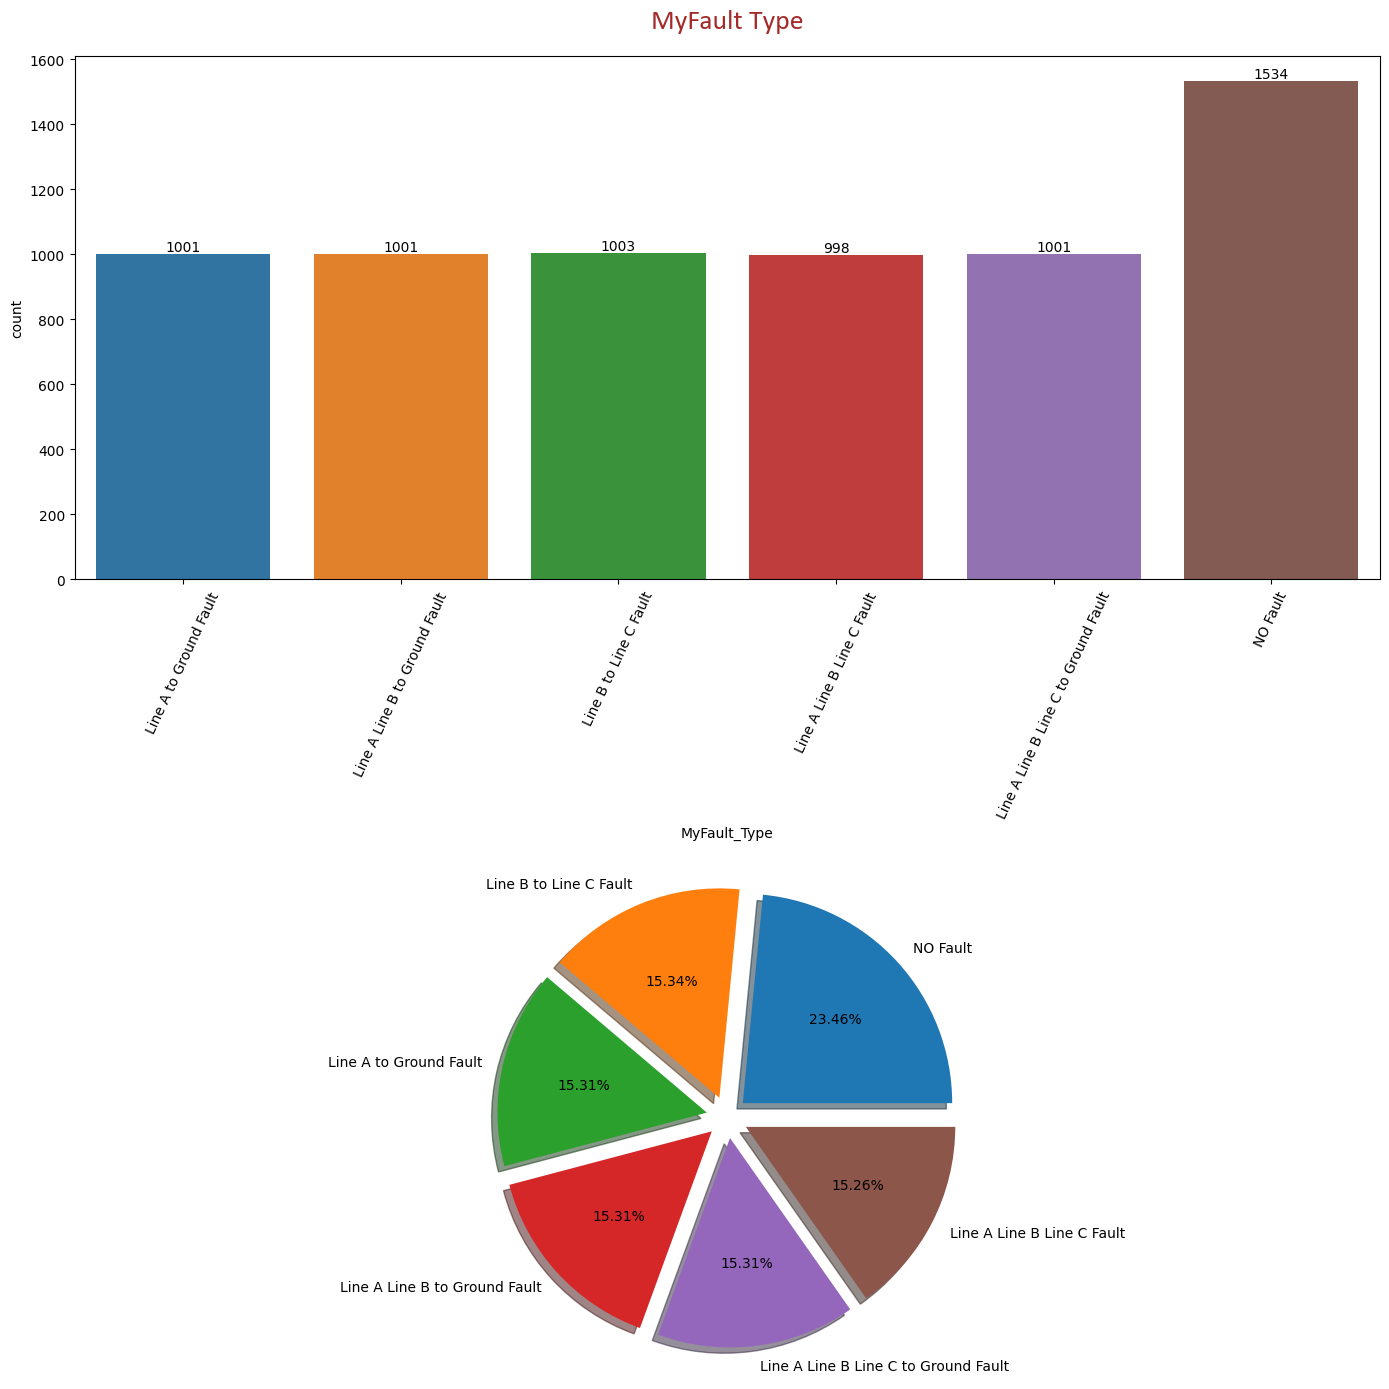

In [19]:
myax = myplt.figure(figsize = (14,14))
myax = myplt.subplot(2,1,1)
myax = mysns.countplot(x='MyFault_Type', data=mydf)
myax.bar_label(myax.containers[0])
myplt.title("MyFault Type", fontsize=20,color = 'Brown',font='Calibri',pad=20)
myplt.xticks(rotation=65)
myplt.tight_layout()

myax =myplt.subplot(2,1,2)
myax=mydf['MyFault_Type'].value_counts().plot.pie(explode=[0.1, 0.1,0.1,0.1, 0.1,0.1],autopct='%1.2f%%',shadow=True);
myplt.tight_layout()
myplt.axis('off');
print("Current timestamp:", timestamp)

Current timestamp: 2024-04-03 20:59:36.500980


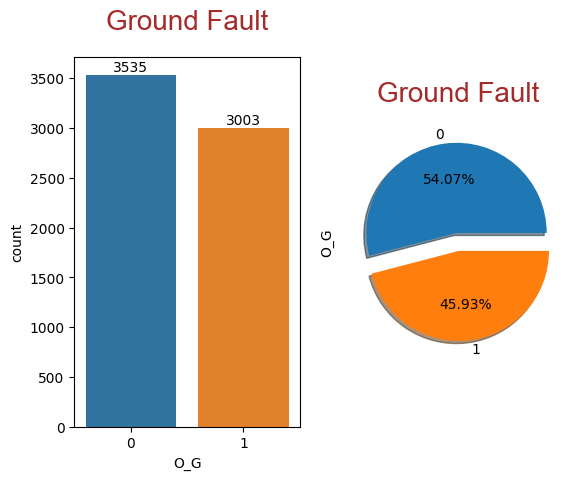

In [20]:
myax = myplt.subplot(1,2,1)
myax = mysns.countplot(x='O_G', data=mydf)
myax.bar_label(myax.containers[0])
myplt.title("Ground Fault", fontsize=20,color = 'Brown',font='Arial',pad=20)

myax = myplt.subplot(1,2,2)
myax=mydf['O_G'].value_counts().plot.pie(explode=[0.1, 0.1],autopct='%1.2f%%',shadow=True);
myax.set_title(label = "Ground Fault", fontsize = 20,color='Brown',font='Arial',pad=20);
print("Current timestamp:", timestamp)

Current timestamp: 2024-04-03 20:59:36.500980


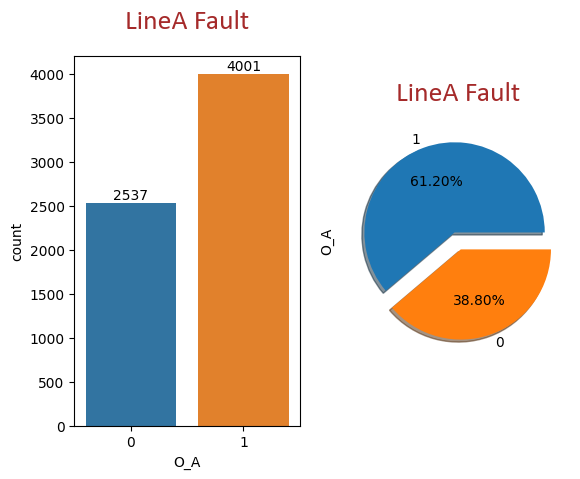

In [21]:
myax = myplt.subplot(1,2,1)
myax = mysns.countplot(x='O_A', data=mydf)
myax.bar_label(myax.containers[0])
myplt.title("LineA Fault", fontsize=20,color = 'Brown',font='Calibri',pad=20)

myax = myplt.subplot(1,2,2)
myax=mydf['O_A'].value_counts().plot.pie(explode=[0.1, 0.1],autopct='%1.2f%%',shadow=True);
myax.set_title(label = "LineA Fault", fontsize = 20,color='Brown',font='Calibri',pad=20);
print("Current timestamp:", timestamp)

Current timestamp: 2024-04-03 20:59:36.500980


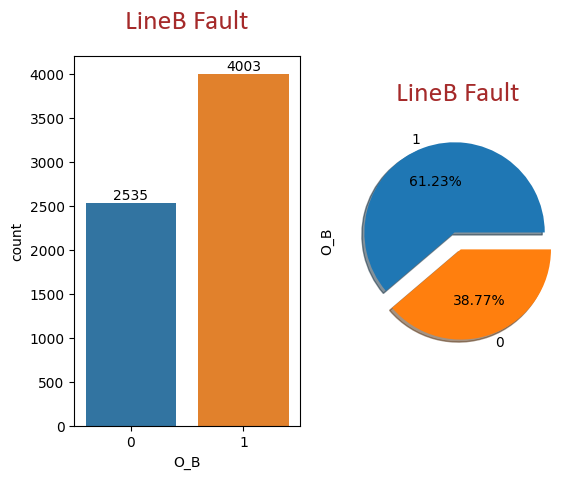

In [22]:
myax = myplt.subplot(1,2,1)
myax = mysns.countplot(x='O_B', data=mydf)
myax.bar_label(myax.containers[0])
myplt.title("LineB Fault", fontsize=20,color = 'Brown',font='Calibri',pad=20)

myax = myplt.subplot(1,2,2)
myax=mydf['O_B'].value_counts().plot.pie(explode=[0.1, 0.1],autopct='%1.2f%%',shadow=True);
myax.set_title(label = "LineB Fault", fontsize = 20,color='Brown',font='Calibri',pad=20);
print("Current timestamp:", timestamp)

Current timestamp: 2024-04-03 20:59:36.500980


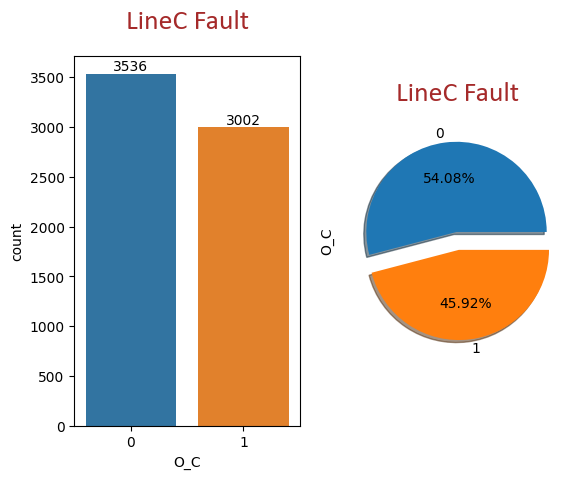

In [37]:
myax = myplt.subplot(1,2,1)
myax = mysns.countplot(x='O_C', data=mydf)
myax.bar_label(myax.containers[0])
myplt.title("LineC Fault", fontsize=20,color = 'Brown',font='Calibri',pad=20)

myax = myplt.subplot(1,2,2)
myax=mydf['O_C'].value_counts().plot.pie(explode=[0.1, 0.1],autopct='%1.2f%%',shadow=True);
myax.set_title(label = "LineC Fault", fontsize = 20,color='Brown',font='Calibri',pad=20);
print("Current timestamp:", timestamp)

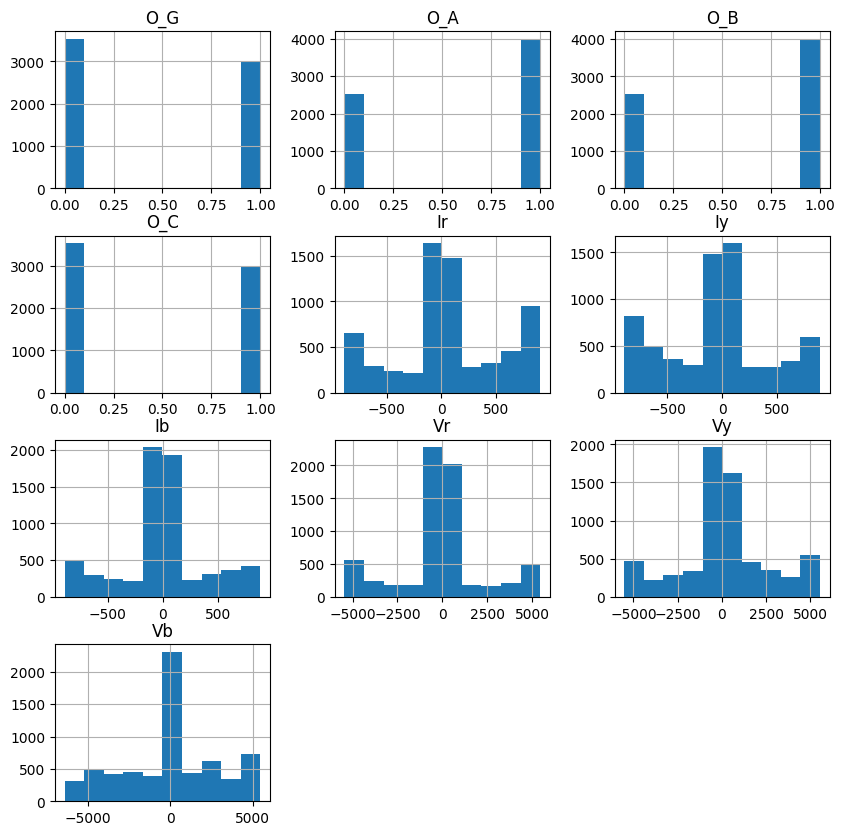

Current timestamp: 2024-04-03 20:59:36.500980


In [24]:
mydf.hist(bins=10, figsize=(10, 10)) 
myplt.show()
print("Current timestamp:", timestamp)

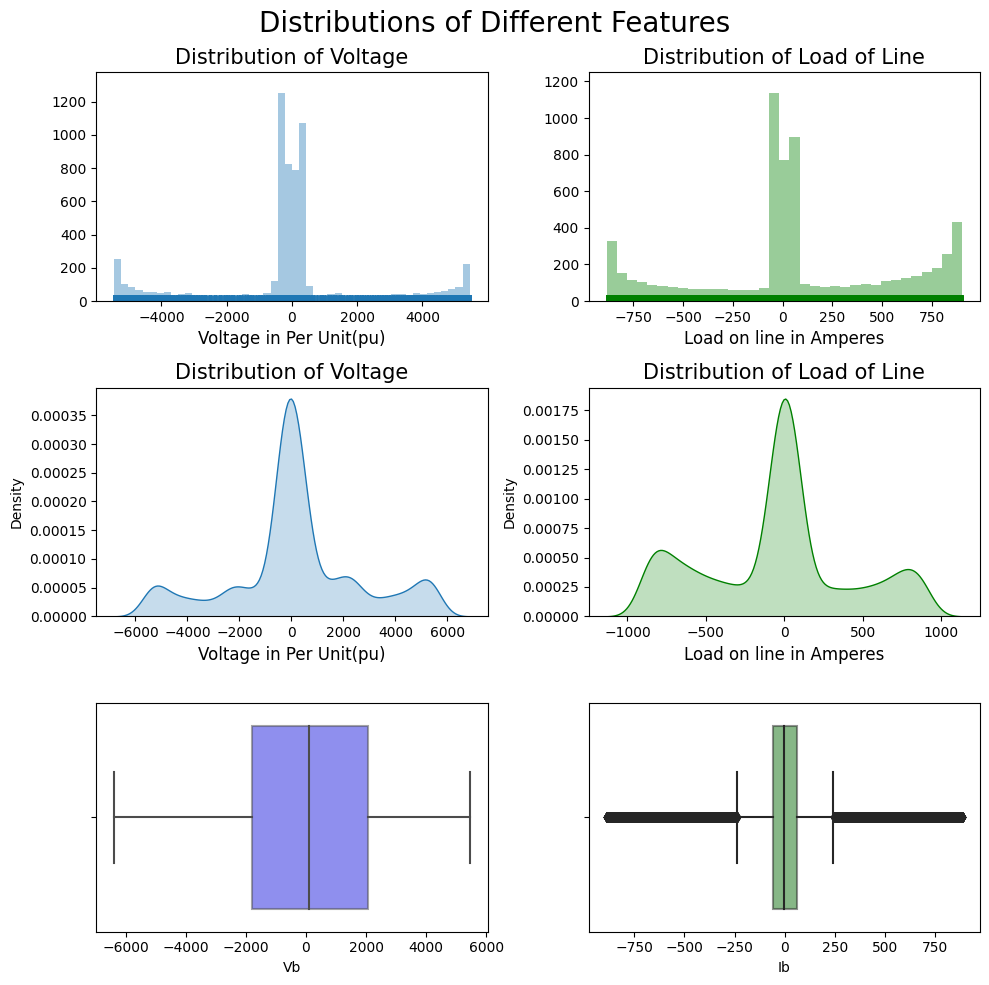

Current timestamp: 2024-04-03 20:59:36.500980


In [25]:
myplt.figure(figsize= (10,10))
myplt.suptitle("Distributions of Different Features", fontsize = 20)

#Histograms
myplt.subplot(3,2,1)
mysns.distplot(mydf['Vr'], rug = True, kde = False)
myplt.xlabel('Voltage in Per Unit(pu)', fontsize = 12)
myplt.title('Distribution of Voltage',fontsize = 15)

myplt.subplot(3,2,2)
mysns.distplot(mydf['Ir'], color= 'green',rug = True, kde = False)
myplt.title('Distribution of Load of Line',fontsize = 15)
myplt.xlabel('Load on line in Amperes', fontsize = 12)

#Kde Plots
myplt.subplot(3,2,3)
mysns.kdeplot(mydf['Vy'], shade = True)
myplt.xlabel('Voltage in Per Unit(pu)', fontsize = 12)
myplt.title('Distribution of Voltage',fontsize = 15)

myplt.subplot(3,2,4)
mysns.kdeplot(mydf['Iy'], shade = True, color = 'g')
myplt.title('Distribution of Load of Line',fontsize = 15)
myplt.xlabel('Load on line in Amperes', fontsize = 12)


#Box Plots
myplt.subplot(3,2,5)
mysns.boxplot(x = mydf['Vb'], orient = 'v',color= 'b', boxprops=dict(alpha=.5))
myplt.subplot(3,2,6)
mysns.boxplot(x = mydf['Ib'], orient = 'v', color= 'g', boxprops=dict(alpha=.5))


myplt.tight_layout()
myplt.show()
print("Current timestamp:", timestamp)

<h1 style="background-color:LightBlue
;font-family:newtimeroman;font-size:300%;text-align:center;border-radius: 150px 150px; color:#FF0000"> Fault Separation into different Categories</h1><a id=0></a>

Current timestamp: 2024-04-03 20:59:36.500980


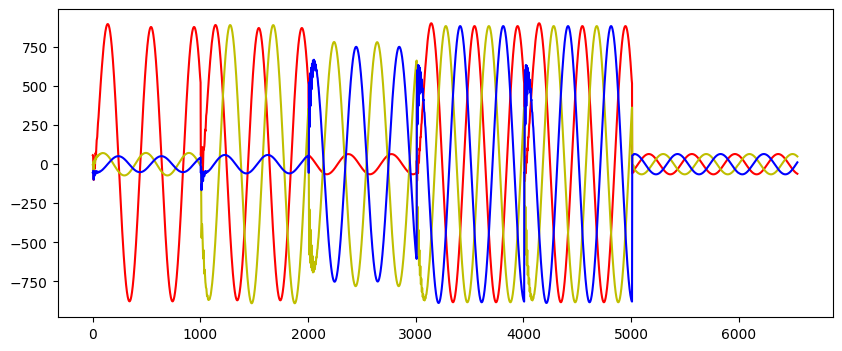

In [26]:
myplt.figure(figsize = (10,4))
myplt.plot(mydf["Ir"],'r')
myplt.plot(mydf["Iy"],'y')
myplt.plot(mydf["Ib"],'b')
print("Current timestamp:", timestamp)

Current timestamp: 2024-04-03 20:59:36.500980


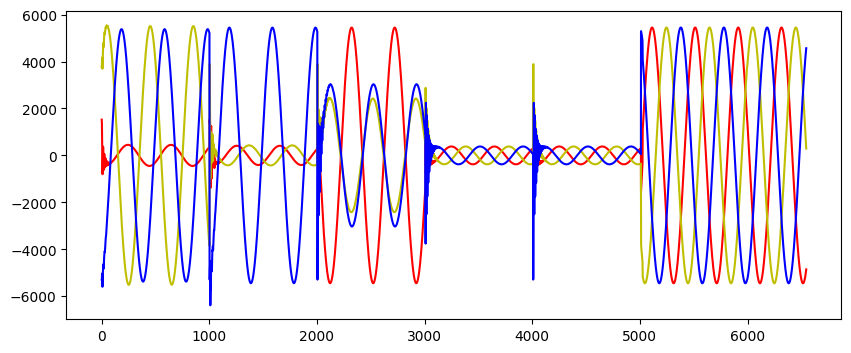

In [27]:
myplt.figure(figsize = (10,4))
myplt.plot(mydf["Vr"],'r')
myplt.plot(mydf["Vy"],'y')
myplt.plot(mydf["Vb"],'b')
print("Current timestamp:", timestamp)

<span style="background-color:LightGreen;
             color:black;
             font-size:25px;
             text-align:center;
             border-radius:50px 80px;
             font-weight:bold;
             border:2px solid red;
             padding:0px 20px;">1. No Fault (Healthy System)
</span>

Current timestamp: 2024-04-03 20:59:36.500980


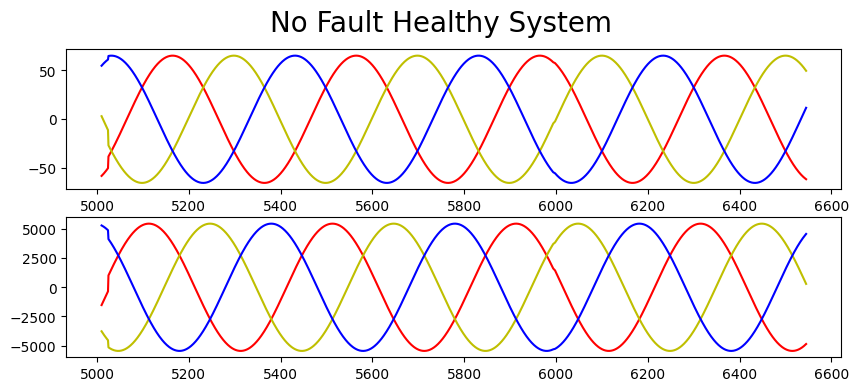

In [31]:
myplt.figure(figsize= (10,4))
myplt.suptitle("No Fault Healthy System", fontsize = 20)

myplt.subplot(2,1,1)
myax = myplt.plot(My_NF["Ir"],'r')
myax = myplt.plot(My_NF["Iy"],'y')
myax = myplt.plot(My_NF["Ib"],'b');

myplt.subplot(2,1,2)
myax = myplt.plot(My_NF["Vr"],'r')
myax = myplt.plot(My_NF["Vy"],'y')
myax = myplt.plot(My_NF["Vb"],'b');

print("Current timestamp:", timestamp)

<span style="background-color:LightGreen;
             color:black;
             font-size:25px;
             text-align:center;
             border-radius:50px 80px;
             font-weight:bold;
             border:2px solid red;
             padding:0px 20px;">2. Faulty system with Line A to Ground Fault
</span>

Current timestamp: 2024-04-03 20:59:36.500980


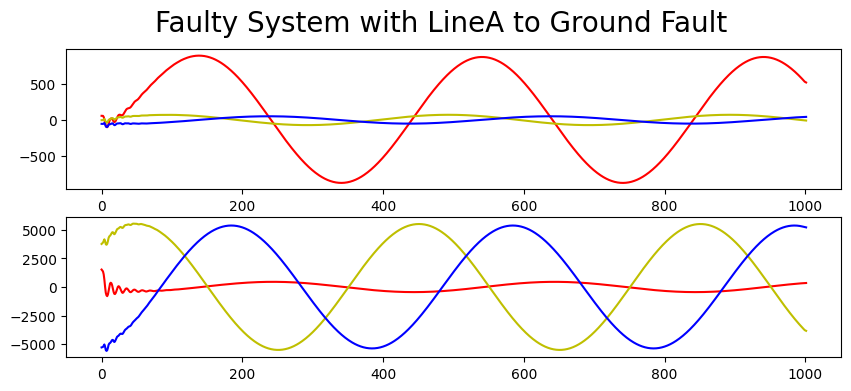

In [33]:
myplt.figure(figsize= (10,4))
myplt.suptitle("Faulty System with LineA to Ground Fault", fontsize = 20)

myplt.subplot(2,1,1)
myax = myplt.plot(My_LG["Ir"],'r')
myax = myplt.plot(My_LG["Iy"],'y')
myax = myplt.plot(My_LG["Ib"],'b');

myplt.subplot(2,1,2)
myax = myplt.plot(My_LG["Vr"],'r')
myax = myplt.plot(My_LG["Vy"],'y')
myax = myplt.plot(My_LG["Vb"],'b');

print("Current timestamp:", timestamp)

<div style="color:white;
       display:fill;
       border-radius:5px;
       background-color:Blue;
       font-size:110%;
       font-family:Nexa;
       letter-spacing:0.5px">
    <p style="padding: 10px;
          color:white;">
Observation: At a time of Line A to ground fault the current in line A increases to 10 fold approximately 1000 Ampears from normal 100 Ampears and voltage is reduced.
    </p>

<span style="background-color:LightGreen;
             color:black;
             font-size:25px;
             text-align:center;
             border-radius:50px 80px;
             font-weight:bold;
             border:2px solid red;
             padding:0px 20px;">3. Faulty System with Line A , Line B to Ground Fault 
</span>

Current timestamp: 2024-04-03 20:59:36.500980


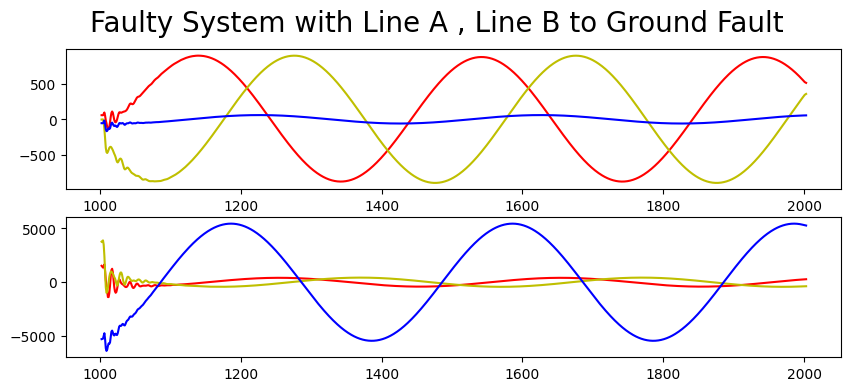

In [35]:
myplt.figure(figsize= (10,4))
myplt.suptitle("Faulty System with Line A , Line B to Ground Fault ", fontsize = 20)

myplt.subplot(2,1,1)
myax = myplt.plot(My_LLG["Ir"],'r')
myax = myplt.plot(My_LLG["Iy"],'y')
myax = myplt.plot(My_LLG["Ib"],'b');

myplt.subplot(2,1,2)
myax = myplt.plot(My_LLG["Vr"],'r')
myax = myplt.plot(My_LLG["Vy"],'y')
myax = myplt.plot(My_LLG["Vb"],'b');

print("Current timestamp:", timestamp)

<span style="background-color:LightGreen;
             color:black;
             font-size:25px;
             text-align:center;
             border-radius:50px 80px;
             font-weight:bold;
             border:2px solid red;
             padding:0px 20px;">4. Faulty System with Line A - Line B - Line C - Ground
</span>

Current timestamp: 2024-04-03 20:59:36.500980


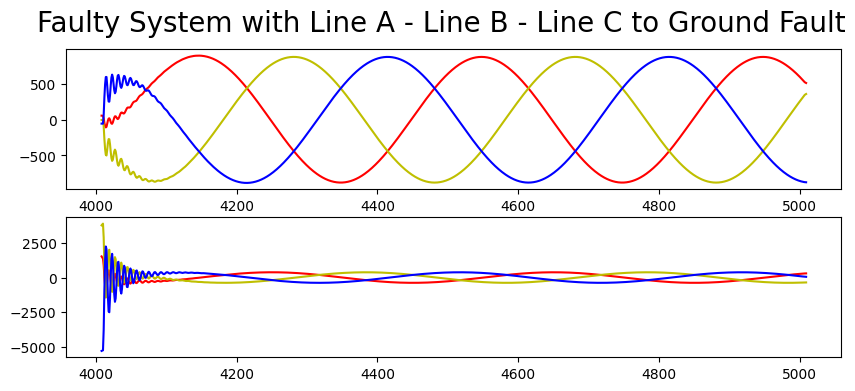

In [38]:
myplt.figure(figsize= (10,4))
myplt.suptitle("Faulty System with Line A - Line B - Line C to Ground Fault", fontsize = 20)

myplt.subplot(2,1,1)
myax = myplt.plot(My_LLLG["Ir"],'r')
myax = myplt.plot(My_LLLG["Iy"],'y')
myax = myplt.plot(My_LLLG["Ib"],'b');

myplt.subplot(2,1,2)
myax = myplt.plot(My_LLLG["Vr"],'r')
myax = myplt.plot(My_LLLG["Vy"],'y')
myax = myplt.plot(My_LLLG["Vb"],'b');

print("Current timestamp:", timestamp)